<img src="https://github.com/alan-barzilay/NLPortugues/blob/master/imagens/logo_nlportugues.png?raw=true"  style="height:65%" align="right">


# Lista 4 - Word2Vec 
**Nome: Felipe de Lima Peressim**

**Numero Usp: 11823558**













______________

Nessa lista nós exploraremos o espaço vetorial gerado pelo algoritmo Word2Vec e algumas de suas propriedades mais interessantes. Veremos como palavras similares se organizam nesse espaço e as relações de palavras com seus sinônimos e antônimos. Também veremos algumas analogias interessantes que o algoritmo é capaz de fazer ao capturar um pouco do nosso uso da língua portuguesa.


In [1]:
from gensim.models import KeyedVectors

# Carregando dados


Para esta lista nós utilizaremos vetores de palavras, também conhecidos como *embeddings*, para lingua portuguesa fornecidos pelo [NILC](http://www.nilc.icmc.usp.br/nilc/index.php). Nós utilizaremos o embedding de 50 dimensões treinado com o algoritmo Word2Vec (Continous Bag of Words) que pode ser encontrado [aqui](http://www.nilc.icmc.usp.br/embeddings) sob a licensa [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/). Para evitar problemas de mémoria você deve utilizar apenas as 200 mil palavras mais comum. Nós ja fornecemos um script que realiza esse pré-processamento por você, basta baixar o arquivo `cbow_s50.zip` do site do NILC, extrai-lo na pasta deste notebook e rodar a célula seguinte.

In [2]:
# Pré-processa embedding
N =  200001
with open("cbow_s50.txt", "r") as file:
    head = [next(file) for x in range(N)]

head[0] = str(N-1)+ " " + "50"+ "\n" # Conserta contagem de palavras
with open("word2vec_200k.txt", "w") as file:
    for line in head:
        file.write(line)

In [3]:
# Carrega word2vec
model = KeyedVectors.load_word2vec_format("word2vec_200k.txt")

# Similaridade e Distância Cosseno 

Como comentamos em sala de aula, podemos considerar as palavras como pontos num espaço n-dimensional e podemos examinar a proximidade delas através da similaridade cosseno:
$$s = \frac{u \cdot v}{||u|| ||v||}, \textrm{ onde } s \in [-1, 1] $$ 


## <font color='blue'>Questão 1 </font>
Palavras [polissemicas](https://pt.wikipedia.org/wiki/Polissemia) e [homônimas](https://pt.wikipedia.org/wiki/Hom%C3%B3nimo) são palavras que possuem mais de um significado. 


Utilizando a função `model.most_similar()`, encontre uma palavra que possua múltiplos significados e que na sua lista de 10 palavras mais similares existam palavras relacionadas a mais de um dos seus significados, lembre-se de consultar sua [documentação](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar). 

Por exemplo, a palavra "manga" possui na sua lista de 10 palavras mais similares as palavras "gola" e "lapela" (que estão relacionadas ao significado de manga de uma camiseta) e a palavra "maçã" (que está relacionada ao significado da fruta manga).



In [4]:
model.most_similar('braço', topn=10)

[('cotovelo', 0.8996624946594238),
 ('braã§o', 0.8755179047584534),
 ('ombro', 0.8626289367675781),
 ('antebraço', 0.856630265712738),
 ('flanco', 0.8495727777481079),
 ('pã©', 0.8446941375732422),
 ('rosto', 0.8304564952850342),
 ('tridente', 0.8260283470153809),
 ('corpo', 0.8252193331718445),
 ('queixo', 0.8248132467269897)]

**<font color='red'> Sua resposta aqui </font>**

**Na lista obtida através do substantivo "Braço" obteve-se palavras com mais de um significado, tais como "cotovelo" e "ombro" relacionados ao corpo humano e "flanco" que pode ser a lateral de qualquer objeto.**


# Sinônimos e Antônimos


As vezes é mais intuitivo trabalhar com uma medida de distancia ao invés da similaridade cosseno, para isso vamos utilizar a distancia cosseno que é simplesmente 1 - Similaridade Cosseno.

## <font color='blue'>Questão 2 </font>


Usando a função [`model.distance(palavra1,palavra2)`](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.distance), encontre 3 palavras onde as palavras p1 e p2 são sinônimas e p1 e p3 são antônimas mas `distance(p1,p3)` < `distance(p1,p2)`.

Proponha uma explicação do porque esse resultado contraintuitivo acontece.






In [5]:
p1 = 'quente'
p2 = 'aquecido'
p3 = 'frio'
x = model.distance(p1, p2)
y = model.distance(p1, p3)

print(y < x)
print(x)
print(y)

True
0.386288583278656
0.23228859901428223


**<font color='red'> Sua resposta aqui </font>**

**O modelo Word2vec não captura similaridade baseada em antônimos e sinônimos. Word2Vec atribuí uma similaridade forte quando duas palavras possuem contexto similar. Por exemplo: "O tempo em São Paulo está..." - aqui a continuação da sentença poderia ser preenchida com as palavras "quente" ou "gelado", assim ambas estariam próximas, configurando uma similaridade maior.**

**Desta forma podemos concluir que a similaridade é capturada no sentido de relação paradigmática, que é uma relação que existe entre elementos da mesma categoria, ou seja, elementos que podem ser substituídos uns pelos outros. Isso contrasta com a relação sintagmática, que se aplica às relações existentes entre elementos que são combinados uns com os outros.**


# Analogias

Existem algumas analogias famosas realizadas por vetores de palavras. O exemplo mais famoso é provavelmente "man : king :: woman : x", onde x é *queen*.
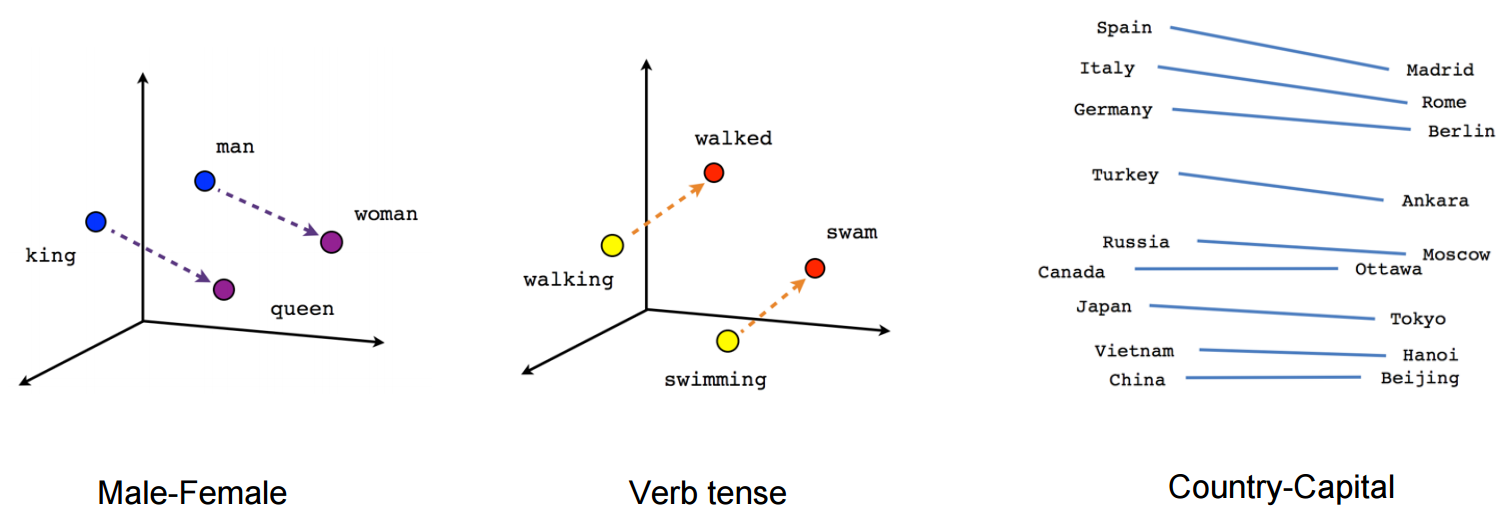

Para formular analogias vamos utilizar a função `most_similar()` que busca as palavras mais similares as listas em  `positive` e mais dissimilares as listadas em  `negative`. Para mais detalhes recomendamos consultar a sua [documentação](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar).




In [6]:
model.most_similar(positive=['mulher', 'engenheiro'], negative=['homem'])

[('engenheira', 0.7883446216583252),
 ('investigadora', 0.7415960431098938),
 ('ex-funcionária', 0.7373332381248474),
 ('enfermeira', 0.7346670031547546),
 ('funcionária', 0.7172970771789551),
 ('bibliotecária', 0.7110161185264587),
 ('arquiteta', 0.7099221348762512),
 ('empresária', 0.7055575847625732),
 ('ex-diretora', 0.7055395841598511),
 ('professora', 0.697813868522644)]

## <font color='blue'>Questão 3 </font>
Encontre analogias que funcionam, ou seja, que a palavra esperada está no topo da lista.

Descreva sua analogia na seguinte forma: 
x:y :: a:b



In [16]:
print(model.most_similar(positive=['ele', 'feminino'], negative=['ela'])[0])
print()
print(model.most_similar(positive=['rico', 'feio'], negative=['pobre'])[0])

('masculino', 0.8161289095878601)

('bonito', 0.6649507880210876)


**<font color='red'> Sua resposta aqui </font>**

**ela:feminino :: ele:masculino**

**pobre:feio :: rico:bonito**

Na primeira analogia sugerida tem-se uma flexão gênero, na segunda se tem uma analogia concebida por um viés capturado pelo modelo de aprendizado, que não configura nenhum tipo de regra gramatical.

## <font color='blue'>Questão 4 </font>
Encontre analogias que **Não** funcionam.

Descreva o resultado esperado da sua analogia na seguinte forma: 
x:y :: a:b

E indique o valor errado de b encontrado



In [8]:
model.most_similar(positive=['mulher', 'rei'], negative=['homem'])

[('esposa', 0.7769601941108704),
 ('governanta', 0.7553685307502747),
 ('sucessora', 0.7502476572990417),
 ('sobrinha', 0.7424737215042114),
 ('filha', 0.7376167178153992),
 ('concubina', 0.7366868853569031),
 ('satrapia', 0.735263466835022),
 ('conterrânea', 0.7217563390731812),
 ('madrasta', 0.7210681438446045),
 ('múmia', 0.7185136079788208)]

**<font color='red'> Sua resposta aqui </font>**

**homem:rei :: mulher:rainha**

**O resultado esperado era "<i>rainha</i>", no entanto a primeira palavra da lista é "<i>esposa</i>".**



# Viés e preconceito adquirido

Como estes vetores são aprendidos a partir de documentos produzidos pela nossa sociedade, ele pode vir a capturar alguns preconceitos e desigualdades presentes na nossa sociedade. É importante estar ciente desse viés de nossos vetores e dos seus perigos, aplicações que utilizam esses modelos podem acabar perpetuando e até mesmo exacerbando desigualdades sociais.

Por exemplo, uma analogia problemática capturada:



In [9]:
model.most_similar(positive=['negro', 'rico'], negative=['pobre'])

[('branco', 0.6632091403007507),
 ('alegre/rs', 0.6620162129402161),
 ('braga-fc', 0.6464027762413025),
 ('sporting-fc', 0.6254757642745972),
 ('côvo', 0.6254614591598511),
 ('alegre-rs', 0.6199707984924316),
 ('vermelho', 0.612277090549469),
 ('covo', 0.604120671749115),
 ('cirílicos', 0.6022459268569946),
 ('benfica-fc', 0.5965930819511414)]

Note também como diferem as palavras mais semelhantes a homem e mulher:

In [10]:
model.most_similar("homem")

[('monstro', 0.9085395336151123),
 ('bebé', 0.9072304368019104),
 ('indivíduo', 0.9050755500793457),
 ('rapaz', 0.9036116003990173),
 ('mendigo', 0.9007540345191956),
 ('rapazola', 0.8992964625358582),
 ('novelo', 0.8938027620315552),
 ('pássaro', 0.889799952507019),
 ('cão', 0.8882535099983215),
 ('cãozinho', 0.8869854807853699)]

In [11]:
model.most_similar("mulher")

[('menina', 0.911119282245636),
 ('amiga', 0.9089193940162659),
 ('cadela', 0.9035040736198425),
 ('rapariga', 0.899989902973175),
 ('enfermeira', 0.8974366784095764),
 ('namorada', 0.8954240083694458),
 ('cafetina', 0.8932163119316101),
 ('prostituta', 0.8917952179908752),
 ('garota', 0.8906298875808716),
 ('cadelinha', 0.8902610540390015)]

## <font color='blue'>Questão 5 </font>

Utiliza a função `most_similar()` para encontrar um outro caso de viés adquirido pelos vetores e explique brevemente o tipo de viés encontrado.



In [12]:
model.most_similar("garçonete")

[('stripper', 0.9092626571655273),
 ('prostituta', 0.8662102222442627),
 ('garotinha', 0.8536578416824341),
 ('faxineira', 0.8528586626052856),
 ('babá', 0.8442896008491516),
 ('espiã', 0.834520697593689),
 ('garota', 0.8308663368225098),
 ('aeromoça', 0.8176290988922119),
 ('corista', 0.8005349636077881),
 ('pegadinha', 0.7996761202812195)]

In [13]:
model.most_similar("lixeiro")

[('seqüestrador', 0.8462200164794922),
 ('paizão', 0.8453372716903687),
 ('garçom', 0.8407609462738037),
 ('calzone', 0.8403022885322571),
 ('paspalho', 0.8365963697433472),
 ('mêdico', 0.8363619446754456),
 ('copeiro', 0.8358283638954163),
 ('carteiro', 0.8322929739952087),
 ('bonzão', 0.8317541480064392),
 ('suquinho', 0.8275444507598877)]

In [14]:
model.most_similar("humilde")

[('miserável', 0.8317208290100098),
 ('respeitável', 0.8233810663223267),
 ('pobre', 0.8147309422492981),
 ('sincera', 0.7943422794342041),
 ('amável', 0.7873817086219788),
 ('ignorante', 0.7824273705482483),
 ('antipática', 0.7785524129867554),
 ('afetuosa', 0.7694804668426514),
 ('bondoso', 0.7639541625976562),
 ('dócil', 0.7632606029510498)]

In [15]:
model.most_similar(positive=['rico', 'feio'], negative=['pobre'])

[('bonito', 0.6649507880210876),
 ('morno', 0.6574501395225525),
 ('lindo', 0.6234444379806519),
 ('branco', 0.6232991814613342),
 ('alegre/rs', 0.6148076057434082),
 ('chato', 0.6064505577087402),
 ('curtinho', 0.6058364510536194),
 ('cansativo', 0.603232741355896),
 ('acanhado', 0.6030526161193848),
 ('bom', 0.5996556878089905)]

**<font color='red'> Sua resposta aqui </font>**

**É possível observar alguns vieses de acordo com as consultas realizadas no modelo. Dentre elas a consulta realizada na função <i>most_similar</i> indica que "feio" é associado com "pobre" e "bonito" com "rico". Ou seja, tudo aquilo que emana beleza vem da riqueza e tudo aquilo que exibe feiura vem da pobreza, o que não é verdade. Esse tipo de viés nem sempre levado em consideração, e por isso é importante destacá-lo para combatê-lo.**

## <font color='blue'>Questão 6 </font>

Qual é a possivel origem desses vieses? Tente explicar como eles podem ter sido capturados pelos vetores de palavras.

**<font color='red'> Sua resposta aqui </font>**

**Os algoritmos que geram <i>word embeddings</i> não apenas preservam relações estatísticas presentes nos dados de treinamento, mas também preservam a estrutura sintática e semântica. Desta forma exibem a capacidade de capturar relações tais como <u>homem:engenheiro :: mulher:engenheira</u>; <u>rico:bonito :: pobre:feio</u>. Assim, a frequência que palavras aparecem dentro de determinados contextos acabam por determinar uma semântica associada e assim tendem a preservar relações problemáticas enraizadas em nossa sociedade capturadas no texto.**